# Customer Churn Prediction using Decision Trees


Kita akan membuat model prediksi Churn rate berbasis decision tree untuk investment bank agar mereka bisa mempertahankan lebih banyak customer

Key Points:
1. Problem Statement
2. Understanding Churn prediction Dataset
3. Exploratory Data Analysis
4. Data preprocessing Steps
5. Model Training
6. Model Evaluation

## 1. Problem statement for Churn Prediction

Memahami problem statement adalah langkah pertama membuat model. Di latihan ini kita mendapatkan sebuah dataset customer dari suatu bank, dan kita ingin membuat sebuah model churn prediction yang dapat mengklasifikasikan customer menjadi 2 kelas: potensi churner dan non-churner. Problem klasifikasi ini dapat di selesaikan menggunakan metode supervised learning, dimana kita akan mendapatkan input dan output data sample yang sudah di berikan label. Model ini harus akurat karena akan mempengaruhi investment yang bank. Ayo kita pelajari dataset lebih dalam.

## 2. Understanding the Dataset for churn prediction

Dataset yang akan kita gunakan untuk membuat nya bisa didapatkan di Kaggle dan didownload dari "https://github.com/TaufiqueSekh/Customer-Churn-Prediction-using-Decision-Trees"

Dataset nya terdiri dari 14 kolom/feature dan 10rb baris/sample.

Mari kita lihat efek dari setiap feature ini terhadap prediksi model nya.

CreditScore — dapat memengaruhi customer churn karena customer yang memiliki credit score tinggi akan cenderung tidak meninggalkan bank.

Geography — lokasi customer dapat memengaruhi keputusan untuk meninggalkan bank.

Tenure — merupakan durasi berapa tahun customer tersebut menjadi client bank. Biasa nya client yang lebih lama menjadi client akan lebih loyal dan cenderung tidak meninggalkan bank.

Balance — merupakan indikator customer churn yang bagus, orang yang memiliki saldo banyak cenderung tidak meninggalkan bank dibandingkan dengan orang yang memiliki saldo sedikit.

NumOfProducts — merupakan jumlah produk yang customer telah beli selama menjadi client bank.

HasCrCard — menunjukan apakah suatu customer memiliki kartu credit atau tidak. Kolom ini relevant karena orang yang punya kartu kredit cenderung tidak meninggalkan bank.

IsActiveMember — customer aktif cenderung tidak meninggalkan bank.

EstimatedSalary — sama seperti balance/saldo, orang yang di estimasi memiliki gaji rendah cenderung meninggalkan bank dibandingkan orang yang memiliki gaji tinggi.

Exited — Kolom target/yang akan di prediksi, menunjukan apakah customer merupakan potensi churner.

Kolom lainnya RowNumber, CustomerId, Surname, Gender, and Age, memiliki arti seperti biasanya.

Ayo kita lihat beberapa baris dataset dan berbagai macam tipe data yang digunakan.

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/DATASET/THRIVE"

churn.csv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATASET/THRIVE/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Kita dapat menyimpulkan kolom Rownumber, CustomerId, and Surname hanya mengidentifikasi unique customer dan tidak memengaruhi target variable, maka kita dapat menghilangkan kolom berikut.

Observasi lain nya adalaha kita memiliki dua kolom kategorikal: geography, dan gender, yang akan kita encode/represntasikan menjadi numerik menggunakan labelencoder() dari scikit learn.

In [ ]:
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary",]
boo_cols = ["HasCrCard", "IsActiveMember", "Gender",]
cat_cols = ["Geography"]
target_col = "Exited"

df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])
df = df[num_cols+boo_cols+cat_cols+[target_col]]

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender,Geography,Exited
0,619,42,2,0.00,1,101348.88,1,1,Female,France,1
1,608,41,1,83807.86,1,112542.58,0,1,Female,Spain,0
2,502,42,8,159660.80,3,113931.57,1,0,Female,France,1
3,699,39,1,0.00,2,93826.63,0,0,Female,France,0
4,850,43,2,125510.82,1,79084.10,1,1,Female,Spain,0


## 3. Exploratory Data Analysis of Bank Customers Dataset



### Heatmap showing the correlation of features.
Heatmap merupakan representasi tabular dari korelasi antar feature. Kita dapat menggunakan heatmap untuk mengetahui bagaimana setiap feature berhubungan dengan feature lain nya dan target variable.

Insight yg bisa kita dapatkan:
*   Age dan target (Exited) memiliki korelasi positif yang cukup kuat dengan nilai: 0.29
*   Balance/Saldo dan target (Exited) memiliki korelasi positif yang sedikit kuat dengan nilai: 0.12
*   Balance/Saldo dan NumOfProducts memiliki korelasi negatif yang cukup dengan nulai: -0.3



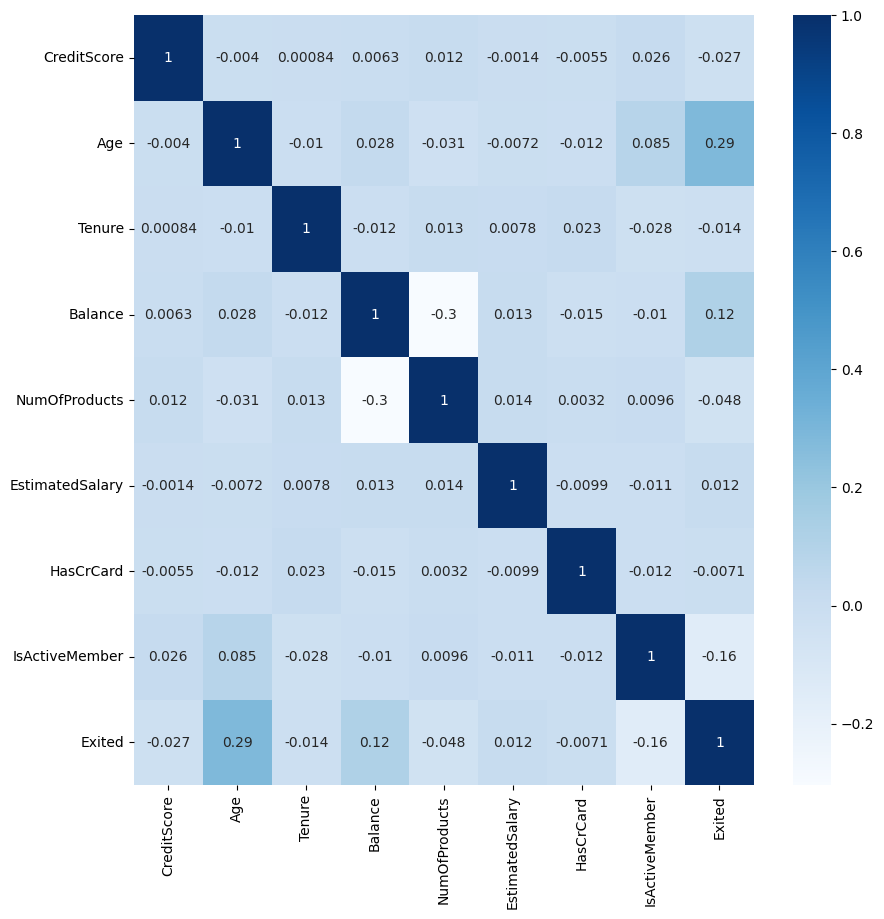

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.select_dtypes("number").corr(), cmap="Blues", annot=True)
plt.show()

##### Count plot to show the trend of boolean and categorical features with target

Count plot dapat digunakan untuk mengetahui relasi feature kategorikal dengan target variable menggunakan jumlah nilai (count) nya.

Insight yang bisa kita dapatkan:
* Customer yang memiliki kartu kredit lebih banyak yang tidak meninggalkan/ganti bank, kemungkinan karena mereka butuh pinjaman atau sedang ada pinjaman.
* Customer aktif lebih banyak yang tidak meninggalkan/ganti bank, kemungkinan karena mereka melakukan banyak transaksi atau mengunjungi bank.
* Customer laki-laki lebih banyak yang tidak meninggalkan/ganti bank.
* Customer dari Spanyol lebih banyak yang tidak meninggalkan/ganti bank.


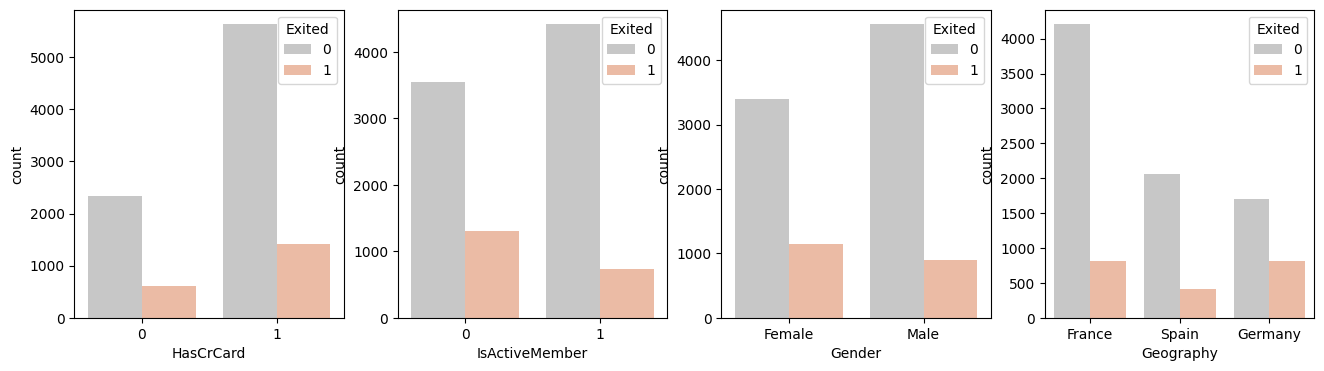

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (16, 4))

for i, subplot in zip(boo_cols+cat_cols, ax.flatten()):
    sns.countplot(x = i, hue="Exited", data=df, ax=subplot, palette="RdGy_r")

plt.show()

## 4. Data preprocessing

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.70550,0.515100,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.45584,0.499797,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,1.00000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,1.00000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.00000,1.000000,1.000000


### 4.1. Checking the presence of null values

In [ ]:
df.isna().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
EstimatedSalary    0
HasCrCard          0
IsActiveMember     0
Gender             0
Geography          0
Exited             0
dtype: int64

Tidak ada nilai yang hilang atau duplikat pada setiap kolom, maka kita tidak perlu menghilangkan kolom manapun.Jika ada kolom yang banyak nilai nya hilang atau duplikat, kita dapat menggunakan df.dropna() untuk menghilangkan nya.

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

###  4.2. Plot Boxplot to check outliers

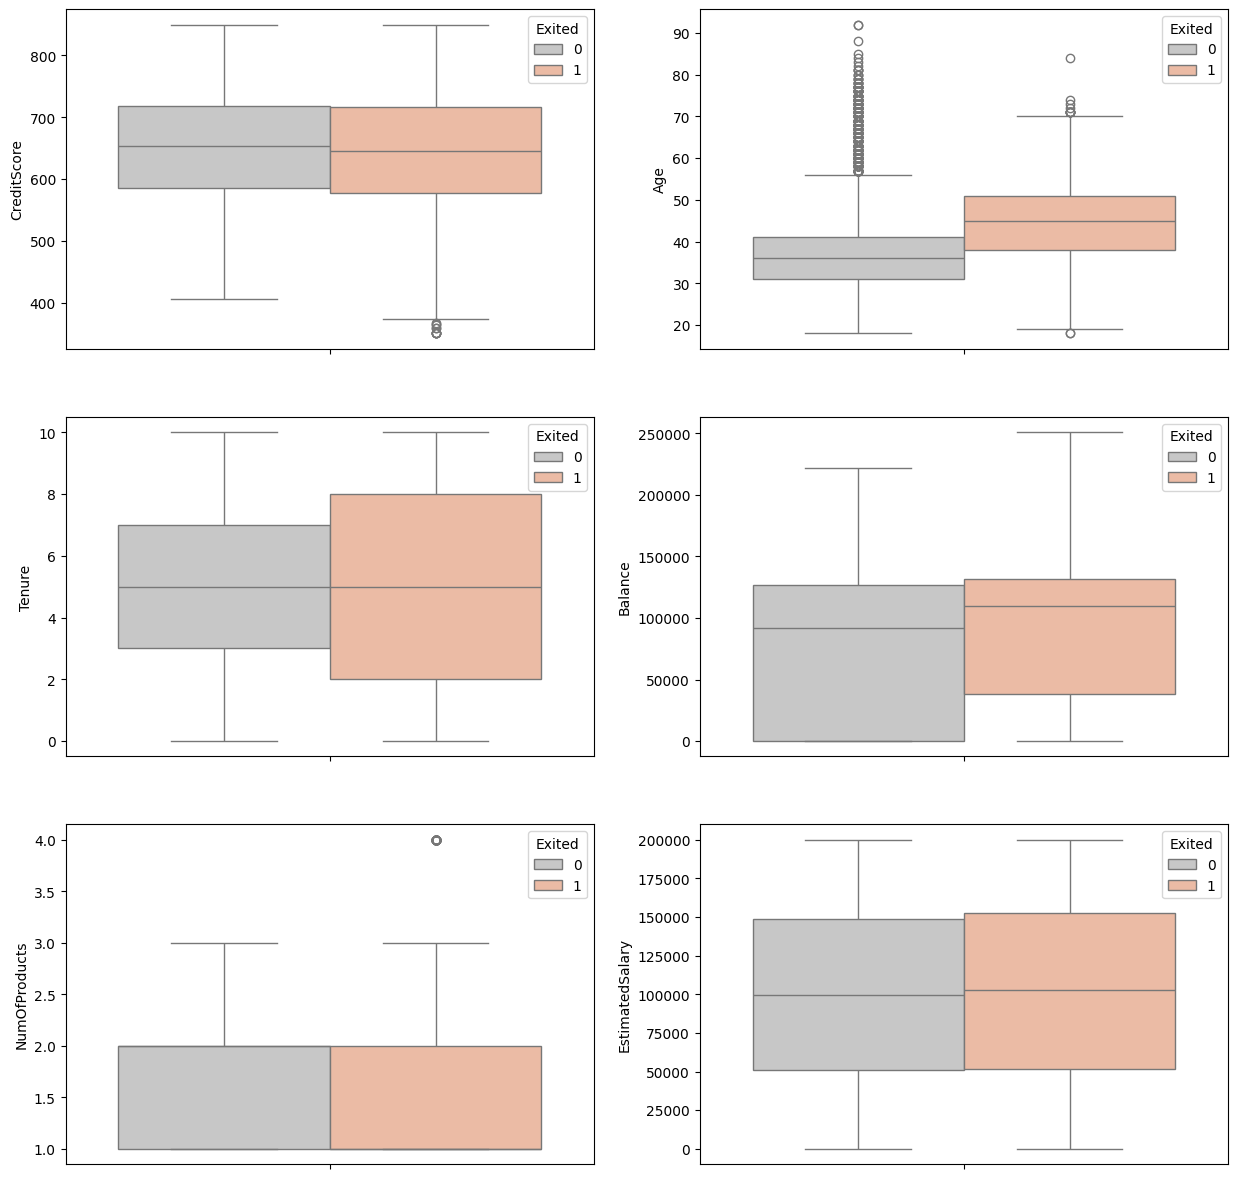

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(hue="Exited", y=i , data=df, ax=subplot, palette="RdGy_r")

plt.show()

### 4.3. Removing outliers.

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan sample. Outlier dapat memengaruhi trend yang dipelajari oleh model dan memanipulasi prediksi ke arah mereka, ada dua metoda yang sering digunakan untuk menghilangkan outlier:
1. Inter Quartile Range (IQR) atau
2. Standar deviasi.

Kita akan menggunakan metode IQR untuk menghilangkan outlier:

In [ ]:
for i in num_cols:
    q75, q25 = np.percentile(df[i], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)


    df=df[(df[i]<max_val)]
    df=df[(df[i]>min_val)]

Kita telah menghilangkan outlier dari dataset dan dapat kita validasi menggunakan boxplot.

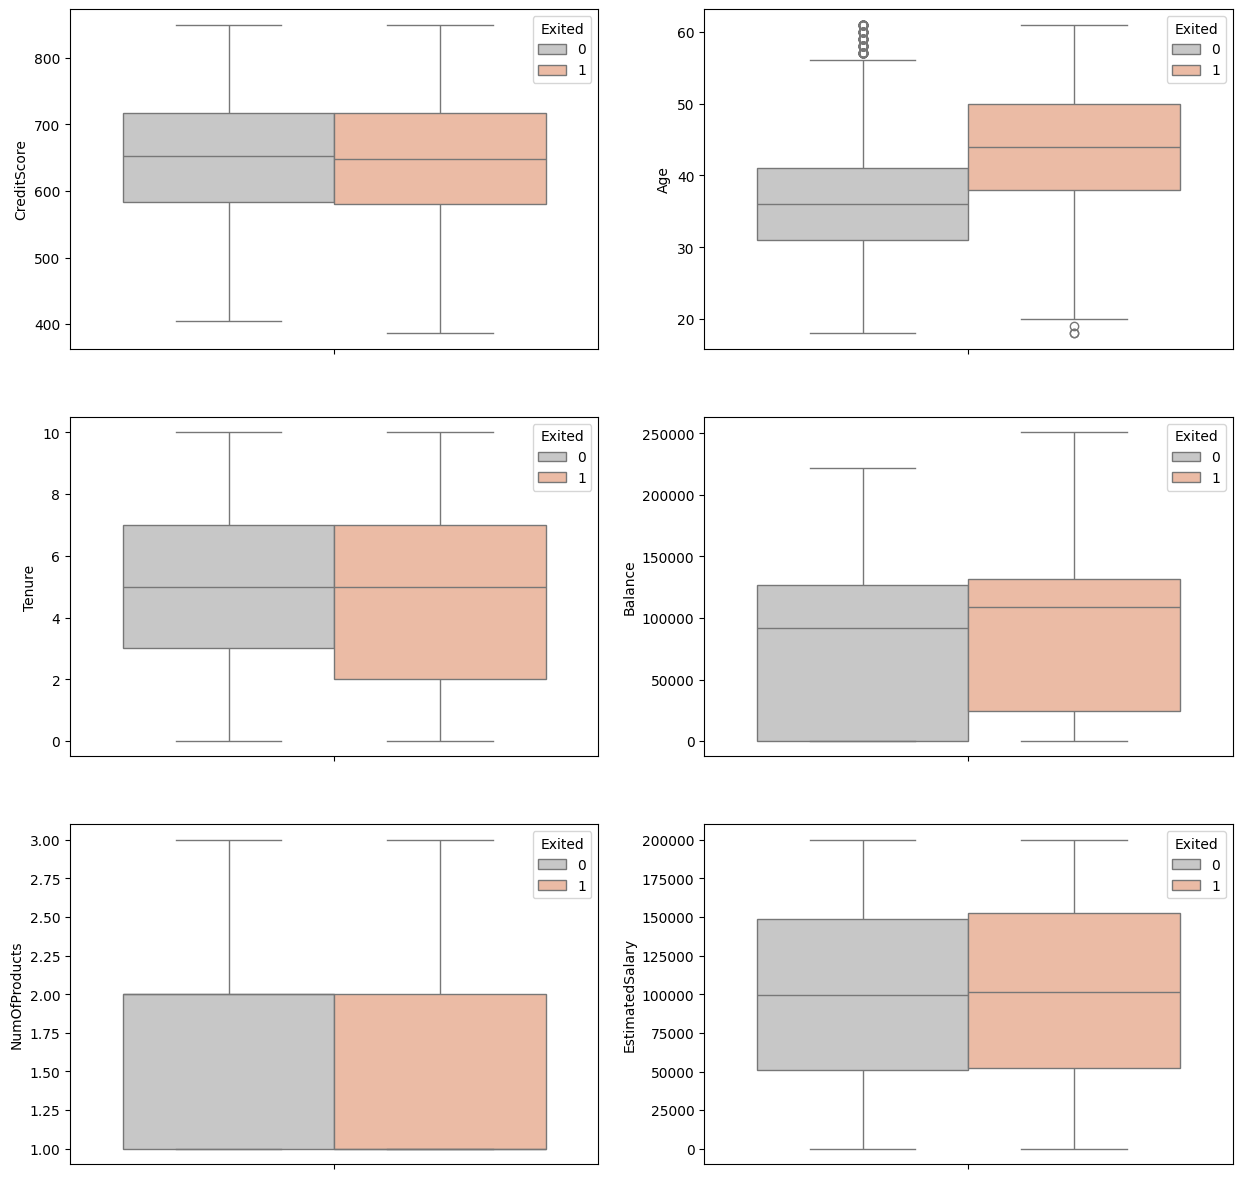

In [ ]:
fig, ax = plt.subplots(3,2, figsize = (15,15))

for i, subplot in zip(num_cols, ax.flatten()):
    sns.boxplot(hue="Exited", y=i , data=df, ax=subplot, palette="RdGy_r")

plt.show()

Kolom age masih memiliki beberapa outliers tapi lebih sedikit dibandingkan sebelum data preprocessing. Boxplot nya menunjukan bahwa data nya sudah berkumpul pada median/nilai tengah untuk kolom Balance. Boxplot juga dapat menunjukan distribusi data nya, seperti Q1, Q2 (Median) dan Q3.

### 4.4. Transform non-numerical labels to numerical labels.
Kita akan merepresentasikan:
*   Gender yg merupakan kolom biner/boolean (2 nilai unik) menggunakan OneHotEncoder
*   Geography yg merupakan merupakan kolom kategorikal (>2 nilai unik) menggunakan OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
for col in boo_cols+cat_cols:
  print(f"Ada {df[col].nunique()} nilai unik di kolom {col}, {df[col].unique()}")

print("\n")

df[boo_cols+cat_cols].head()

Ada 2 nilai unik di kolom HasCrCard, [1 0]
Ada 2 nilai unik di kolom IsActiveMember, [1 0]
Ada 2 nilai unik di kolom Gender, ['Female' 'Male']
Ada 3 nilai unik di kolom Geography, ['France' 'Spain' 'Germany']




,HasCrCard,IsActiveMember,Gender,Geography
0,1,1,Female,France
1,0,1,Female,Spain
2,1,0,Female,France
3,0,0,Female,France
4,1,1,Female,Spain


In [ ]:
ohe_enc = OneHotEncoder(drop="first")
df["Gender"] = ohe_enc.fit_transform(df[["Gender"]]).toarray()

In [ ]:
ord_enc = OrdinalEncoder()

df[cat_cols] = ord_enc.fit_transform(df[cat_cols])

In [ ]:
dict(
    zip(
      ohe_enc.feature_names_in_,
      ohe_enc.categories_
    )
)

{'Gender': array(['Female', 'Male'], dtype=object)}

In [ ]:
dict(
    zip(
      ord_enc.feature_names_in_,
      ord_enc.categories_
    )
)

{'Geography': array(['France', 'Germany', 'Spain'], dtype=object)}

In [ ]:
df[boo_cols+cat_cols].head()

,HasCrCard,IsActiveMember,Gender,Geography
0,1,1,0.0,0.0
1,0,1,0.0,2.0
2,1,0,0.0,0.0
3,0,0,0.0,0.0
4,1,1,0.0,2.0


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender,Geography,Exited
0,619,42,2,0.00,1,101348.88,1,1,0.0,0.0,1
1,608,41,1,83807.86,1,112542.58,0,1,0.0,2.0,0
2,502,42,8,159660.80,3,113931.57,1,0,0.0,0.0,1
3,699,39,1,0.00,2,93826.63,0,0,0.0,0.0,0
4,850,43,2,125510.82,1,79084.10,1,1,0.0,2.0,0


Hasil observasi menunjukan bank seharusnya mengeluarkan biaya lebih untuk mempertahankan kualitas service dan pelanggan. Produk seperti kartu kredit, pinjaman, dan deposito itu penting untuk mempertahankan pelanggan dan memastikan engagement.

## 5. Model Training

Kita sudah dapat membuat model predikisi customer churn nya! Tapi pertama-tama, kita harus memelih algoritma machine learning apa yang dapat menghasilkan prediksi paling akurat.

Kita hanya memilik dataset kecil yang terdiri dari 10rb sample. Maka kita memerlukan algoritma yang dapat belajar dengan baik hanya munggunakan data training yang sedikit. Decision tree merupakan opsi terbaik karena algoritma berbasis tree itu mudah untuk diimplementasi, dijelaskan, bekerja dengan baik menggunakan dataset yang sedikit, dan butuh data preprocessing yang minimum.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dtree=DecisionTreeClassifier()

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Gender,Geography,Exited
0,619,42,2,0.00,1,101348.88,1,1,0.0,0.0,1
1,608,41,1,83807.86,1,112542.58,0,1,0.0,2.0,0
2,502,42,8,159660.80,3,113931.57,1,0,0.0,0.0,1
3,699,39,1,0.00,2,93826.63,0,0,0.0,0.0,0
4,850,43,2,125510.82,1,79084.10,1,1,0.0,2.0,0


In [ ]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# 6. Model Evaluation

In [ ]:
y_pred = pd.Series(dtree.predict(X_test), name=y_test.name)
y_pred

0       0
1       0
2       0
3       0
4       0
       ..
2850    1
2851    0
2852    0
2853    0
2854    0
Name: Exited, Length: 2855, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
print(f" Classification report :\n {classification_report(y_test, y_pred)}")

 Classification report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2284
           1       0.47      0.46      0.47       571

    accuracy                           0.79      2855
   macro avg       0.67      0.67      0.67      2855
weighted avg       0.79      0.79      0.79      2855



In [ ]:
print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

Accuracy (Test Set): 0.79
F1-Score (Test Set): 0.47


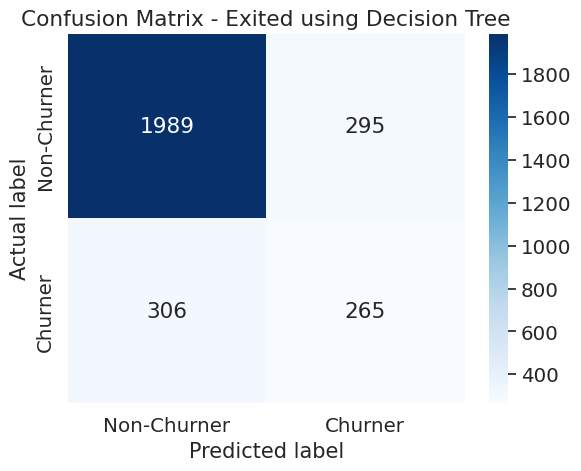

<Figure size 1000x700 with 0 Axes>

In [ ]:
matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))#plot the result
matrix_df.index = ["Non-Churner", "Churner"]
matrix_df.columns = ["Non-Churner", "Churner"]

ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="Blues")#set axis titles
ax.set_title("Confusion Matrix - Exited using Decision Tree")
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("Actual label", fontsize=15)
plt.show()

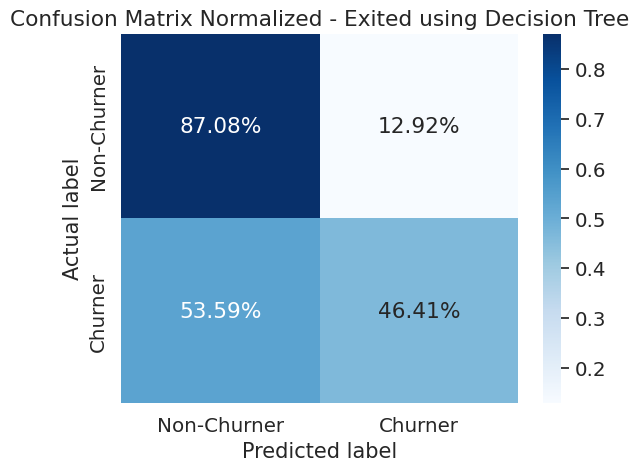

<Figure size 1000x700 with 0 Axes>

In [ ]:
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df.div(matrix_df.sum(axis=1), axis=0), annot=True, fmt=".2%", ax=ax, cmap="Blues")#set axis titles
ax.set_title("Confusion Matrix Normalized - Exited using Decision Tree")
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("Actual label", fontsize=15)
plt.show()